# Regresión logística

#### Para el siguiente ejercicio, decidimos generar el enunciado con una intelgiencia artificial a partir del siguiente prompt


``` txt
ACTÚA como un tutor experto en Data Science y Machine Learning, especializado en la enseñanza de modelos de clasificación.

OBJETIVO: Generar un ejercicio completo y didáctico de Regresión Logística.

ESCENARIO: Un estudio hipotético para predecir si un estudiante APRUEBA (1) o FALLA (0) una asignatura, basándose en la única variable de entrada: Horas de Estudio por Semana (X).

REQUERIMIENTOS DETALLADOS:

1.  Enunciado del ejercicio: Formula un enunciado donde se explíque el objetivo del ejercicio poniendo un contexto inventado de la vida real.
2.  Conjunto de Datos: Crea un conjunto de datos ficticio y pequeño (mínimo 15, máximo 25 filas) con la variable 'Horas_Estudio' (X) y el resultado 'Aprueba' (Y). Asegúrate de que los datos muestren una clara tendencia sigmoidal (a más horas de estudio, mayor probabilidad de aprobar).

TONO: Mantén un tono didáctico, claro y profesional, pero que sea fácil de digerir.
```

#### Enunciado

Imagina que eres un analista de datos para el Departamento de Estadística de la Universidad TechGenius. La universidad está preocupada por las altas tasas de reprobación en la asignatura introductoria "Fundamentos de Programación".

Tu tarea es desarrollar un modelo predictivo simple que ayude a identificar a los estudiantes en riesgo. Para esta fase inicial, el objetivo es determinar si la cantidad de horas que un estudiante dedica a estudiar por semana (X) es un predictor significativo para aprobar (Y=1) o fallar (Y=0) la asignatura.

El reto: Usarás la Regresión Logística para modelar la probabilidad de que un estudiante apruebe en función de sus horas de estudio, y luego clasificarás el resultado.


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.special import expit

from sklearn.linear_model import LogisticRegression

In [2]:
# 1. Cargar el Dataset Real desde el CSV
try:
    df = pd.read_csv("alumnos.csv")
    #print("DataFrame cargado Bebesote. Primeras filas:")
    #print(df.head())
except FileNotFoundError:
    print("No se encontró el archivo 'alumnos.csv'.")
    exit()

# 2. Asignar Variables

# Variable independiente (input) - Las horas de estudio
# X Debe ser un DataFrame (matriz bidimensional)
X = df[['Horas_Estudio']] 

# Variable resultado -> Variable dependiente
Y = df['Aprueba']         

# 3. Reestructurar X para scikit-learn
X_reshaped = X.values.reshape(-1, 1)

In [10]:
# 2. Inicializar y Entrenar el Modelo
modelo_logistico = LogisticRegression(random_state=42, max_iter=200)
modelo_logistico.fit(X_reshaped, Y)

# 3. Mostrar Coeficientes (para la interpretación)
print("--- Resultados del Entrenamiento ---")
print(f"Intercepto (B): {modelo_logistico.intercept_[0]:.3f}")
print(f"Coeficiente (B1 para Horas_Estudio): {modelo_logistico.coef_[0][0]:.3f}")

--- Resultados del Entrenamiento ---
Intercepto (B): -4.334
Coeficiente (B1 para Horas_Estudio): 0.727


In [18]:
# 4. Predicción para 7 Horas de Estudio (Respuesta a la Pregunta 1)

horas_test : float = 6

horas_estudio_pred = np.array([[horas_test]])
probabilidad_aprobacion = modelo_logistico.predict_proba(horas_estudio_pred)[0][1]

print(f"\nProbabilidad de Aprobar estudiando {horas_test} horas: {probabilidad_aprobacion:.3f}")

if probabilidad_aprobacion >= 0.5:
    print("Clasificación: Aprueba (1)")
else:
    print("Clasificación: Falla (0)")


Probabilidad de Aprobar estudiando 6 horas: 0.507
Clasificación: Aprueba (1)


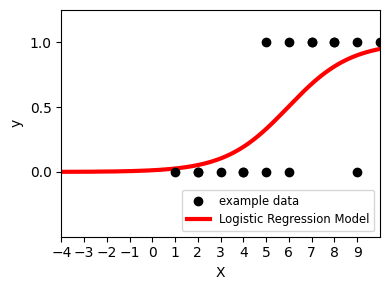

In [ ]:
# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()

plt.scatter(X_reshaped.ravel(), Y, label="example data", color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * modelo_logistico.coef_ + modelo_logistico.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.5, 1.25)
plt.xlim(-4, 10)
plt.legend(
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()